In [25]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import torch
# import seaborn as sns

# from gglm.glm.mmdglm import MMDGLM
# # from gglm.cnncritic import MMDCritic
from sptr.sptr import SpikeTrain
# from gglm.utils import shift_array
from kernel.fun import KernelFun
# from kernel.rect import KernelRect
from gglm.glm.base import GLM

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# eta = KernelFun.exponential([10], coefs=[7])
# eta = KernelFun.exponential([10, 50], coefs=[7, -1.5])
eta = KernelFun.exponential([10, 50], coefs=[-1, 2])

glm = GLM(u0=4, eta=eta)

t = np.arange(0, 1000, 1)

u, r, mask_spikes = glm.sample(t, shape=(5000,))
r_mean = np.mean(r, 1)
r_var = np.var(r, 1)

psth = np.mean(mask_spikes, 1)
var = np.var(mask_spikes, 1)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(t, psth)
ax1.plot(t, r_mean)
ax2.plot(t, var)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(psth, var)
ax1.plot([0.008, 0.02], [0.008, 0.02], 'k--')
# ax2.plot(t, r_var)

AttributeError: 'NoneType' object has no attribute 'shape'

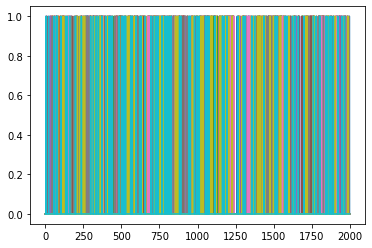

In [8]:
plt.plot(mask_spikes)

Starting gradient ascent... 

 Iteration 159 of 200 | Elapsed time: 5.93 seconds | objective=-4806.35
 
 Iteration 159 of 200 | Converged | Elapsed time: 0.0989 minutes | Log posterior is monotonic 

(50000, 10) (50000, 10) (50000, 10)
(50000, 10) (50000, 10)
True True


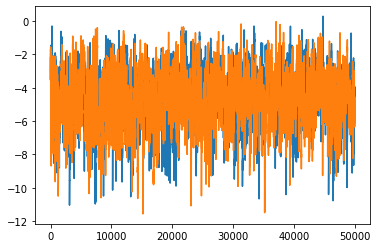

In [32]:
kappa = KernelFun.exponential([10], coefs=[2])
eta = KernelFun.exponential([10], coefs=[-5])

glm = GLM(u0=-3.5, kappa=kappa, eta=eta)

t = np.arange(0, 5000, .1)

stim = np.random.randn(len(t), 10)
u, r, mask_spikes = glm.sample(t, stim=stim)
# u, r, mask_spikes = glm.sample(t, shape=(10, 2))
# u, r, mask_spikes = glm.sample(t, stim=stim, shape=(2,))
u2, r2 = glm.sample_conditioned(t, mask_spikes, stim=stim)

glm_fit = GLM(u0=-3, kappa=KernelFun.exponential([10], coefs=[0.5]), 
              eta=KernelFun.exponential([10], coefs=[-3]))
newton_kwargs=dict(stop_cond=1e-20)
glm_fit.fit(t, mask_spikes, stim=stim, newton_kwargs=newton_kwargs, verbose=True)

print(u.shape, r.shape, mask_spikes.shape)
print(u2.shape, r2.shape)
print(np.allclose(u, u2), np.allclose(r, r2))

fig, ax = plt.subplots()
ax.plot(u[:, :2])
# ax.plot(u[:, 0, :2])
# ax.plot(u[:, 1, :2])

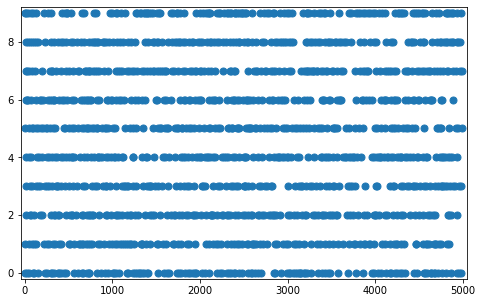

In [33]:
from sptr.sptr import SpikeTrain
st = SpikeTrain(t, mask_spikes)
st.plot()

-3.5 -3.478107101645903


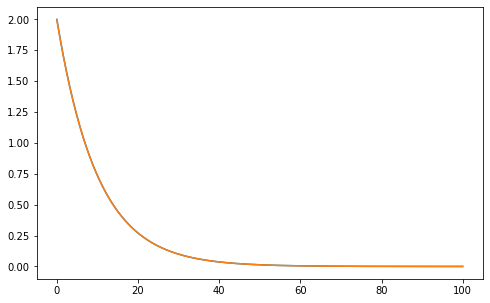

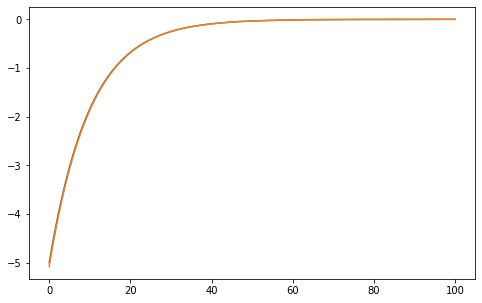

In [34]:
print(glm.u0, glm_fit.u0)
ax = glm.kappa.plot()
glm_fit.kappa.plot(ax=ax)
ax = glm.eta.plot()
glm_fit.eta.plot(ax=ax)

In [124]:
a = np.random.randn(10, 2, 5)
b = np.stack([a] * 3, 2)
np.allclose(b[:, :, 0, :], b[:, :, 1, :])

True

In [115]:
a = (2, 3)
b = (2,3)
a == b
# print(a[2:])

True

False

In [40]:
a.shape + () + a.shape

(10, 2, 10, 2)

In [ ]:

a21.plot(t, psth)
a21.plot(t, r_mean)